# import library

In [19]:
import numpy as np
import pandas as pd
from  sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Load  data

In [20]:
dataset = pd.read_csv("https://github.com/ezekumar/Deeplearning/raw/master/Resister_data.csv")

filter_less_than_10k = dataset['Resistor Value(ohms)'] < 10000
dataset_res_less_than_10k = dataset[filter_less_than_10k]
dataset_res = dataset_res_less_than_10k

In [21]:
dataset_res.head()

,Band_1,Band_2,Band_3,Band_4,Resistor Value(ohms)
0,GREEN,BLUE,RED,GOLD,5600
1,BROWN,BLACK,RED,GOLD,1000
2,ORANGE,ORANGE,RED,GOLD,3300
3,YELLOW,VIOLET,RED,GOLD,4700
4,YELLOW,VIOLET,BROWN,GOLD,470


# Preprocessing the dataset

In [22]:
scaler = preprocessing.MinMaxScaler()
print(scaler.fit(dataset_res[['Resistor Value(ohms)']]))

dataset_res['Resistor Value(ohms)'] = scaler.transform(dataset_res[['Resistor Value(ohms)']]) 

cat = pd.Categorical(dataset_res['Band_1'], 
                     categories=['BLACK','BROWN','RED','ORANGE','YELLOW','GREEN','BLUE','VIOLET','GREY','WHITE'], 
                     ordered=True)


labels, unique = pd.factorize(cat, sort=True)

dataset_res['Band_1'] = labels



cat = pd.Categorical(dataset_res['Band_2'], 
                     categories=['BLACK','BROWN','RED','ORANGE','YELLOW','GREEN','BLUE','VIOLET','GREY','WHITE'], 
                     ordered=True)

labels, unique = pd.factorize(cat, sort=True)

dataset_res['Band_2'] = labels


cat = pd.Categorical(dataset_res['Band_3'], 
                     categories=['BLACK','BROWN','RED','ORANGE','YELLOW','GREEN','BLUE','VIOLET','GREY','WHITE'], 
                     ordered=True)

labels, unique = pd.factorize(cat, sort=True)
print(cat)
dataset_res['Band_3'] = labels

Band_4_encoder =preprocessing.LabelEncoder()
Band_4_encoder.fit(dataset_res['Band_4'])
dataset_res['Band_4'] = Band_4_encoder.transform(dataset_res['Band_4'])



dataset_res.head()

MinMaxScaler(copy=True, feature_range=(0, 1))
[RED, RED, RED, RED, BROWN, ..., BROWN, BROWN, BROWN, BROWN, BROWN]
Length: 104
Categories (10, object): [BLACK < BROWN < RED < ORANGE ... BLUE < VIOLET < GREY < WHITE]


C:\MyComputer\Software\Installed\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\MyComputer\Software\Installed\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\MyComputer\Software\Installed\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Band_1,Band_2,Band_3,Band_4,Resistor Value(ohms)
0,4,6,1,0,0.567010
1,0,0,1,0,0.092784
2,2,3,1,0,0.329897
3,3,7,1,0,0.474227
4,3,7,0,0,0.038144


Dealing with missing value 

In [23]:
#A quick summary of the data columns
dataset_res.describe()

,Band_1,Band_2,Band_3,Band_4,Resistor Value(ohms)
count,104.000000,104.000000,104.000000,104.0,104.000000
mean,4.211538,4.750000,0.596154,0.0,0.350852
std,2.396085,2.974813,0.493043,0.0,0.319324
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.000000,1.000000,0.000000,0.0,0.058505
50%,4.000000,6.000000,1.000000,0.0,0.273196
75%,6.000000,7.000000,1.000000,0.0,0.628866
max,8.000000,9.000000,1.000000,0.0,1.000000


In [24]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
dataset_res.dtypes

Band_1                    int64
Band_2                    int64
Band_3                    int64
Band_4                    int32
Resistor Value(ohms)    float64
dtype: object

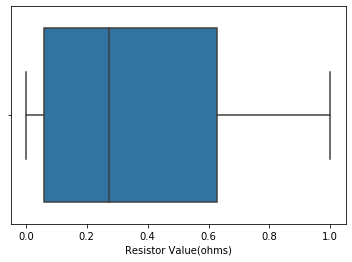

In [25]:
sns.boxplot(x=dataset_res['Resistor Value(ohms)'])

0.058505154639175265
0.6288659793814433


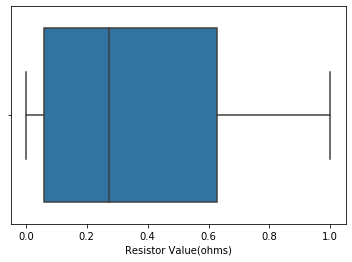

In [26]:
Q1 = dataset_res['Resistor Value(ohms)'].quantile(0.25)
Q3 = dataset_res['Resistor Value(ohms)'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dataset_res['Resistor Value(ohms)'] >= Q1 - 1.5 * IQR) & (dataset_res['Resistor Value(ohms)'] <= Q3 + 1.5 *IQR)
dataset_res = dataset_res[filter] 
dataset_res.head()
sns.boxplot(x=dataset_res['Resistor Value(ohms)'])
print(Q1)
print(Q3)

# BiVariate Plots
A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

C:\MyComputer\Software\Installed\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\MyComputer\Software\Installed\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


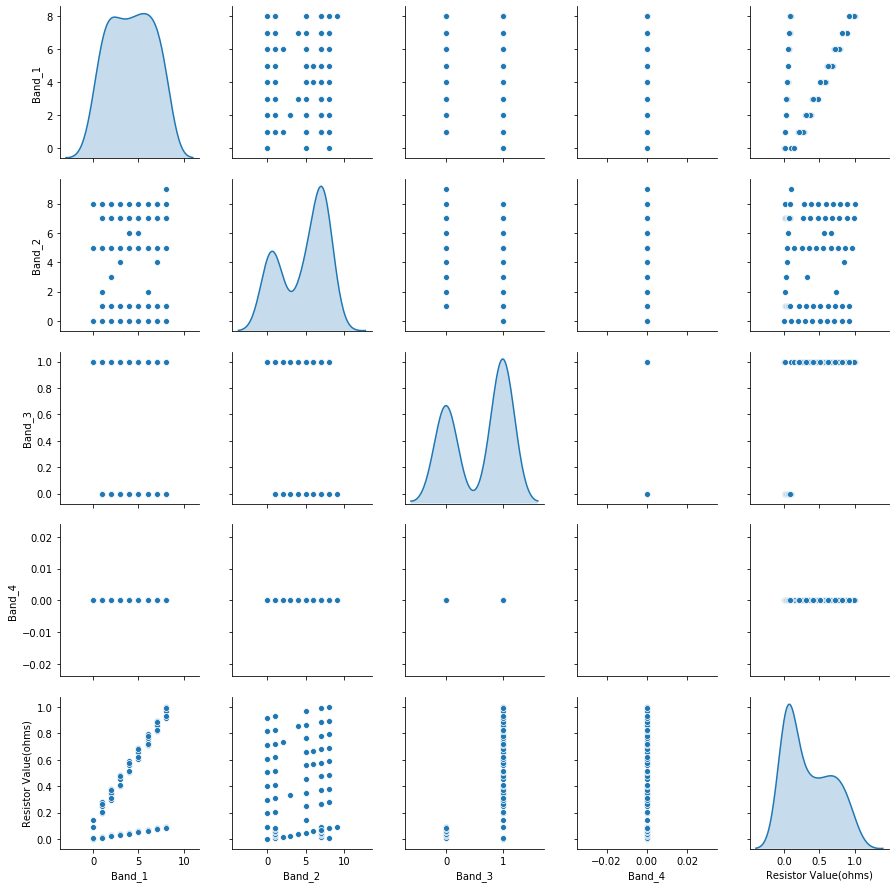

In [27]:
cData_attr = dataset_res.iloc[:, 0:5]
sns.pairplot(cData_attr, diag_kind='kde')

# Spliting data

In [28]:
X = dataset_res.drop(['Resistor Value(ohms)','Band_4'],axis=1)
y = dataset_res[['Resistor Value(ohms)']]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=1)
#train_test_split?

In [30]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Band_1 is 0.0743283878691495
The coefficient for Band_2 is 0.004057663916933357
The coefficient for Band_3 is 0.5537634540151328


In [32]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.31447371015816866


In [33]:
print(regression_model.score(x_train, y_train))
y_pred = regression_model.predict(x_test)


0.8937550726914072


0.9991543308543694


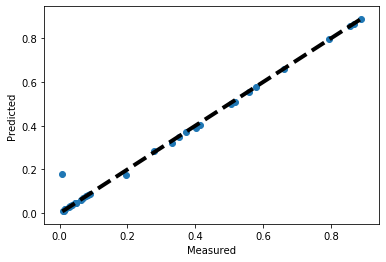

     Band_1  Band_2  Band_3
165       1       1       0
50        1       7       0
150       2       7       0
80        4       0       1
55        4       7       1
Actual
[[ 200.]
 [ 270.]
 [ 370.]
 [5000.]
 [5700.]]
Predicted 
[[ 203.39986883]
 [ 270.82197586]
 [ 370.59430914]
 [4923.29085825]
 [5705.21110079]]


In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
print(x_test[:5])
print("Actual")
print(scaler.inverse_transform(y_test[:5]))
print("Predicted ")
print(scaler.inverse_transform(y_pred[:5]))


In [74]:
X_test2 = poly.fit_transform(np.array([[4,3,0]]))
y_pred = poly_clf.predict(X_test2)
print(scaler.inverse_transform(y_pred))

[[524.57421322]]
